Comparação e carteira com o CDI e outros benchmarks

1. Instalando e importando bibliotecas

In [129]:
#usarei a biblioteca yfinance para obter os dados de ativos brasileiros e a Quandl para obter a taxa DI (depósito interbancário), que determina o CDI.
!pip install -q yfinance
!pip install -q quandl

2. Após a instalação, importe essas e outras bibliotecas mostradas a seguir

In [130]:
import yfinance as yf
import pandas as pd
import numpy as np
import quandl
from datetime import datetime

3. Importando dados pelo input do usuário 

In [131]:
# Solicita ao usuário que insira os códigos dos ativos separados por vírgula
ativos_input = input("Digite os códigos dos ativos separados por vírgula (sem aspas e opcional '.SA'): ")

# Dividir ativos separados por vírgula
ativos = ativos_input.split(',')

# Remover espaços em branco ao redor de cada ativo e adicionar ".SA" se necessário
ativos = [(ativo.strip() + ".SA" if ".SA" not in ativo else ativo.strip()) for ativo in ativos]

Digite os códigos dos ativos separados por vírgula (sem aspas e opcional '.SA'): PETR4,VALE3,BBAS3,ABEV3,CIEL3,EZTC3,ECOR3,WEGE,RADL,OIBR3


In [132]:
# Solicita ao usuário que insira as datas de início e fim
inicio = input("Digite a data de início (no formato 'AAAA-MM-DD'): ")
fim = input("Digite a data de fim (no formato 'AAAA-MM-DD'): ")

# Adiciona aspas simples às datas
inicio = f"'{inicio}'"
fim = f"'{fim}'"

# Converte as datas para objetos datetime
inicio = datetime.strptime(inicio, "'%Y-%m-%d'")
fim = datetime.strptime(fim, "'%Y-%m-%d'")


Digite a data de início (no formato 'AAAA-MM-DD'): 2010-01-01
Digite a data de fim (no formato 'AAAA-MM-DD'): 2020-01-01


4. Resutados colocados pelo usuário 

In [138]:
print("Ativos inseridos pelo usuário:", ativos)
print("Data de início:", inicio)
print("Data de fim:", fim)

Ativos inseridos pelo usuário: ['PETR4.SA', 'VALE3.SA', 'BBAS3.SA', 'ABEV3.SA', 'CIEL3.SA', 'EZTC3.SA', 'ECOR3.SA', 'WEGE.SA', 'RADL.SA', 'OIBR3.SA']
Data de início: 2010-01-01 00:00:00
Data de fim: 2020-01-01 00:00:00


5. Extrair os preços de fechamento de todos esses papéis de uma só vez, para um intervalo específico

In [139]:
# Cria um DataFrame vazio para armazenar os preços
precos = pd.DataFrame()

# Loop através dos ativos e baixa os preços
for ativo in ativos:
    try:
        # Baixa os preços e armazena em um DataFrame
        precos_ativo = yf.download(ativo, start=inicio, end=fim)
        
        # Adiciona os preços ao DataFrame principal Adj Close
        precos[ativo] = precos_ativo['Adj Close']
    except Exception as e:
        print(f"Erro ao baixar preços para {ativo}: {e}")

# Exibe os preços
print(precos)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WEGE.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADL.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


             PETR4.SA   VALE3.SA   BBAS3.SA   ABEV3.SA  CIEL3.SA   EZTC3.SA  \
Date                                                                          
2010-01-04  11.430120  23.415783  12.018465   3.638694  4.457099   3.668714   
2010-01-05  11.332111  23.634069  11.897883   3.660097  4.426069   3.740815   
2010-01-06  11.485245  24.134304  11.913958   3.697437  4.414784   3.715369   
2010-01-07  11.378054  24.234354  11.917979   3.714797  4.519161   3.706886   
2010-01-08  11.316798  24.470840  11.986308   3.707662  4.462742   3.732335   
...               ...        ...        ...        ...       ...        ...   
2019-12-20  11.726900  35.773674  38.845005  15.930834  6.907702  44.794464   
2019-12-23  11.819911  35.636559  40.016579  15.972958  6.956634  45.370388   
2019-12-26  11.978801  35.773674  40.473042  16.191996  7.095278  46.110874   
2019-12-27  11.991353  35.924049  40.298061  16.141449  6.964791  46.595383   
2019-12-30  11.857764  35.722980  40.183952  15.7286

In [140]:
precos_ativo.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [141]:
precos.columns

Index(['PETR4.SA', 'VALE3.SA', 'BBAS3.SA', 'ABEV3.SA', 'CIEL3.SA', 'EZTC3.SA',
       'ECOR3.SA', 'WEGE.SA', 'RADL.SA', 'OIBR3.SA'],
      dtype='object')

3. Simulação a criação de uma carteira  Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira A carteira terá um valor investido total de R$ 20 mil, distibuídos nos seguintes ativos

6. Grafico de linhas das empresas escolhidas 

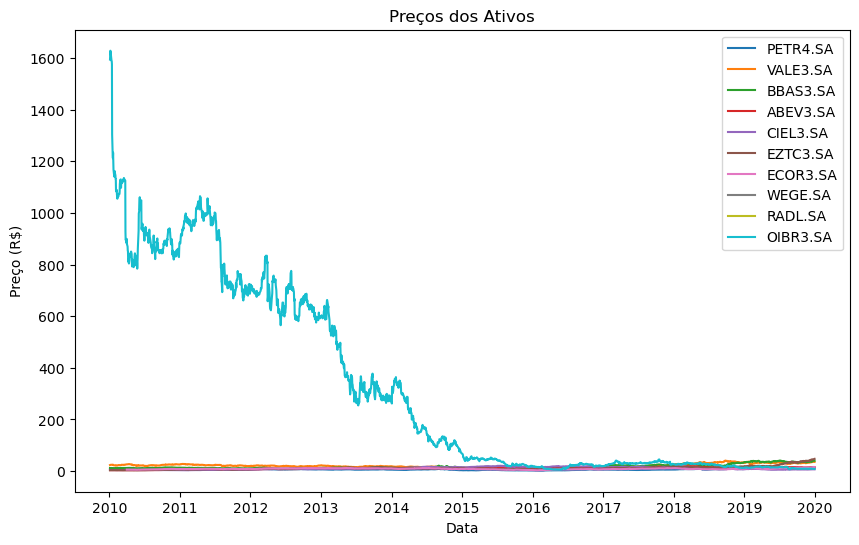

In [142]:
import matplotlib.pyplot as plt

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Loop através das colunas do DataFrame precos e plota cada uma delas
for coluna in precos.columns:
    plt.plot(precos.index, precos[coluna], label=coluna)

# Adiciona título e rótulos dos eixos
plt.title('Preços dos Ativos')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()


7. Escolha o ano para entender 

Digite o ano desejado para visualizar o gráfico: 2015


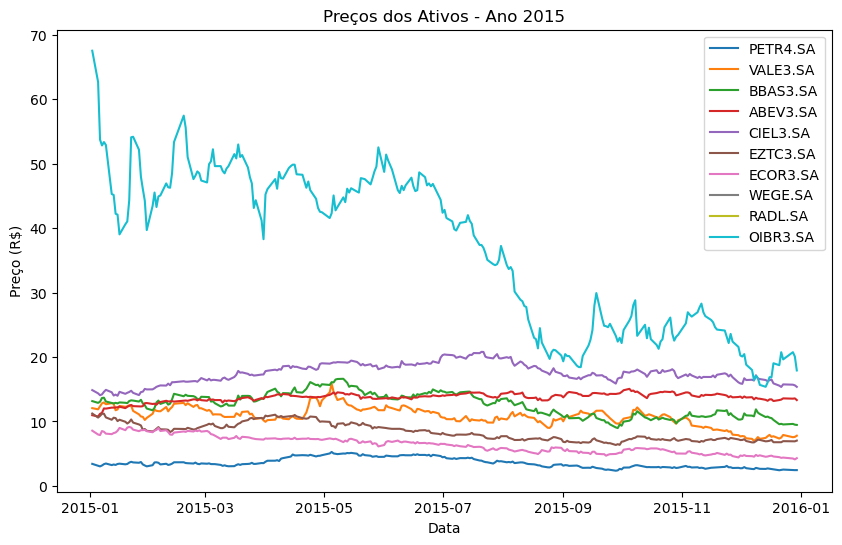

As empresas com os maiores preços de fechamento médios em 2015 foram: OIBR3.SA, CIEL3.SA e ABEV3.SA.


In [143]:
# Solicita ao usuário que insira o ano desejado
ano_desejado = int(input("Digite o ano desejado para visualizar o gráfico: "))

# Filtra o DataFrame de preços pelo ano desejado
precos_ano_desejado = precos.loc[str(ano_desejado)]

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Plot dos dados
for coluna in precos_ano_desejado.columns:
    plt.plot(precos_ano_desejado.index, precos_ano_desejado[coluna], label=coluna)

# Adiciona título e rótulos dos eixos
plt.title(f'Preços dos Ativos - Ano {ano_desejado}')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()

# Calcula o preço de fechamento médio de cada empresa para o ano desejado
precos_ano_desejado_mean = precos.loc[str(ano_desejado)].mean()

# Ordena as empresas com base no preço de fechamento médio
ranking_empresas = precos_ano_desejado_mean.sort_values(ascending=False)

# Cria uma frase com base no ranking
frase_ranking = f"As empresas com os maiores preços de fechamento médios em {ano_desejado} foram: {ranking_empresas.index[0]}, {ranking_empresas.index[1]} e {ranking_empresas.index[2]}."

print(frase_ranking)



8. Simulação a criação de uma carteira

In [128]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Solicita ao usuário que insira as ações que deseja investir, separadas por vírgula
acoes_escolhidas = input("Digite as ações que deseja investir, separadas por vírgula (por exemplo, PETR4.SA,VALE3.SA): ")

# Dividir as ações separadas por vírgula
acoes = acoes_escolhidas.split(',')

# Solicita ao usuário que insira as datas de início e fim relacionadas às ações escolhidas anteriormente
data_inicio = input("Digite a data de início (no formato 'AAAA-MM-DD'): ")
data_fim = input("Digite a data de fim (no formato 'AAAA-MM-DD'): ")

# Converte as datas para objetos datetime
data_inicio = datetime.strptime(data_inicio, "%Y-%m-%d")
data_fim = datetime.strptime(data_fim, "%Y-%m-%d")

# Solicita ao usuário que insira a quantidade de ações escolhidas anteriormente
quantidade_acoes = int(input("Digite a quantidade de ações que deseja comprar (mínimo 100, múltiplos de 100): "))

# Verifica se a quantidade de ações é múltiplo de 100 e maior ou igual a 100
if quantidade_acoes < 100 or quantidade_acoes % 100 != 0:
    print("Quantidade inválida de ações. A quantidade mínima é 100 e deve ser múltiplo de 100.")
    exit()

# Função para calcular o valor total do lote de ações
def calcular_valor_total_lote(acoes, quantidade_acoes, data_inicio):
    valor_total = 0
    for acao in acoes:
        # Baixa os preços da ação na data de início
        preco_inicio = yf.download(acao, start=data_inicio, end=data_inicio)['Adj Close'].iloc[0]
        valor_total += preco_inicio * quantidade_acoes
    return valor_total

# Calcula o valor total do lote de ações
valor_total_lote = calcular_valor_total_lote(acoes, quantidade_acoes, data_inicio)
print(f"Valor total do lote de ações: R${valor_total_lote:.2f}")

# Função para calcular o valor total do aporte em reais para cada ação escolhida
def calcular_aporte(acoes, quantidade_acoes, data_inicio):
    aportes = {}
    for acao in acoes:
        # Baixa os preços da ação na data de início
        preco_inicio = yf.download(acao, start=data_inicio, end=data_inicio)['Adj Close'].iloc[0]
        aporte = preco_inicio * quantidade_acoes
        aportes[acao] = aporte
    return aportes

# Exibe os aportes em reais para cada ação escolhida
aportes = calcular_aporte(acoes, quantidade_acoes, data_inicio)
print("Aportes em reais para cada ação escolhida:")
for acao, aporte in aportes.items():
    print(f"{acao}: R${aporte:.2f}")

# Exibe o valor total do aporte em reais correspondente a todas as ações escolhidas
valor_total_aporte = sum(aportes.values())
print(f"Valor total do aporte em reais: R${valor_total_aporte:.2f}")

# Função para calcular o lucro ou prejuízo para cada ação escolhida
def calcular_lucro_prejuizo(acoes, quantidade_acoes, data_fim):
    resultado = {}
    for acao in acoes:
        # Baixa os preços da ação na data de fim
        preco_fim = yf.download(acao, start=data_fim, end=data_fim)['Adj Close'].iloc[0]
        # Calcula o valor do investimento na data de fim
        valor_investimento = preco_fim * quantidade_acoes
        # Calcula o lucro ou prejuízo
        lucro_prejuizo = valor_investimento - valor_total_lote
        resultado[acao] = lucro_prejuizo
    return resultado

# Exibe o lucro ou prejuízo para cada ação escolhida
lucro_prejuizo = calcular_lucro_prejuizo(acoes, quantidade_acoes, data_fim)
print("Lucro/Prejuízo para cada ação escolhida:")
for acao, resultado in lucro_prejuizo.items():
    print(f"{acao}: R${resultado:.2f}")


Digite as ações que deseja investir, separadas por vírgula (por exemplo, PETR4.SA,VALE3.SA): PETR4.SA,VALE3.SA
Digite a data de início (no formato 'AAAA-MM-DD'): 2020-01-02
Digite a data de fim (no formato 'AAAA-MM-DD'): 2020-12-15
Digite a quantidade de ações que deseja comprar (mínimo 100, múltiplos de 100): 100


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PETR4.SA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-02 00:00:00 -> 2020-01-02 00:00:00)')


IndexError: single positional indexer is out-of-bounds